In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import astropy.units as u

mpl.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix',
                            'image.cmap': 'viridis'})

path = '/astro/store/gradscratch/tmp/scw7/tessData/lightcurves/all_lc/'

In [2]:
sectors = [pd.read_csv('TESS-Gaia/gaiatess{0}_xmatch_1arsec-result.csv'.format(n+1)) for n in range(15)]

data = pd.concat(sectors,sort=True)

In [3]:
flares = pd.read_csv('1to13_param_out.csv')
unique_tics = np.unique(flares['TIC'])

data_dd = data.drop_duplicates('ticid')

tess_gaia = data_dd[np.isin(data_dd['ticid'], unique_tics)]

In [4]:
len(tess_gaia)

118887

In [5]:
#sorted_tess_gaia = tess_gaia.set_index('ticid')
#print(len(sorted_tess_gaia))
#sorted_tess_gaia = sorted_tess_gaia.reindex(index=unique_tics, fill_value=0)
#print(len(sorted_tess_gaia))

In [6]:
len(tess_gaia), len(tess_gaia[tess_gaia['source_id'] > 0])

(118887, 118887)

In [7]:
tess_gaia['source_id']

0        4613644974485983104
1        4613782413441133696
2        4613787700545468800
3        4613787704840817664
4        4613916485140439168
5        4614483077225903232
6        4614776676894701440
7        4614836703357503104
8        4614864607761106432
9        4614897558749924352
10       4614919308462547072
11       4614931093854496640
12       4614969851639215488
13       4615026270329620608
14       4615055854064590208
15       4615110932725370624
16       4615112032236982656
17       4615164636996477696
18       4615201775577968896
19       4615252456190967424
20       4615264623834941440
21       4615337225962072448
22       4615347911841098240
23       4615407349891806336
24       4615479127384787072
25       4615487171860512384
26       4615487996494226304
27       4615518439222361856
28       4615556475452740480
29       4615559602188919552
                ...         
18539    6764567310746461824
18540    6764585315249574016
18541    6764666576031119488
18542    67646

In [8]:
tess_gaia[0:5]['r_est']

0     80.588773
1    944.379157
2     34.322036
3     32.703952
4    477.089968
Name: r_est, dtype: float64

In [9]:
tess_gaia[0:5]['phot_bp_mean_mag'] - tess_gaia[0:5]['phot_rp_mean_mag']

0    1.107963
1    1.187740
2    2.232726
3    2.718326
4    1.185687
dtype: float64

In [10]:
tics = tess_gaia['ticid']
dist = tess_gaia['r_est'].values*u.pc
Gbp_min_Grp = tess_gaia['phot_bp_mean_mag'] - tess_gaia['phot_rp_mean_mag']

In [11]:
iso_table1 = pd.read_csv('output221284170243.dat.txt', comment='#', delim_whitespace=True)
iso_table2 = pd.read_csv('output768246532491.dat.txt', comment='#', delim_whitespace=True)
print(iso_table1.columns)
print(iso_table2.columns)

Index(['Zini', 'MH', 'logAge', 'Mini', 'int_IMF', 'Mass', 'logL', 'logTe',
       'logg', 'label', 'McoreTP', 'C_O', 'period0', 'period1', 'pmode',
       'Mloss', 'tau1m', 'X', 'Y', 'Xc', 'Xn', 'Xo', 'Cexcess', 'Z', 'mbolmag',
       'TESSmag', 'Jmag', 'Hmag', 'Ksmag', 'Keplermag', 'gmag', 'rmag', 'imag',
       'zmag', 'DDO51_finfmag'],
      dtype='object')
Index(['Zini', 'MH', 'logAge', 'Mini', 'int_IMF', 'Mass', 'logL', 'logTe',
       'logg', 'label', 'McoreTP', 'C_O', 'period0', 'period1', 'pmode',
       'Mloss', 'tau1m', 'X', 'Y', 'Xc', 'Xn', 'Xo', 'Cexcess', 'Z', 'mbolmag',
       'Gmag', 'G_BPbrmag', 'G_BPftmag', 'G_RPmag'],
      dtype='object')


In [12]:
iso_table1['Gmag'] = iso_table2['Gmag']
iso_table1['G_BPbrmag'] = iso_table2['G_BPbrmag']
iso_table1['G_BPftmag'] = iso_table2['G_BPftmag']
iso_table1['G_RPmag'] = iso_table2['G_RPmag']

In [13]:
iso_table1.to_csv('isochrones.txt')

In [14]:
iso = pd.read_csv('isochrones.txt')
print(iso.columns)

Index(['Unnamed: 0', 'Zini', 'MH', 'logAge', 'Mini', 'int_IMF', 'Mass', 'logL',
       'logTe', 'logg', 'label', 'McoreTP', 'C_O', 'period0', 'period1',
       'pmode', 'Mloss', 'tau1m', 'X', 'Y', 'Xc', 'Xn', 'Xo', 'Cexcess', 'Z',
       'mbolmag', 'TESSmag', 'Jmag', 'Hmag', 'Ksmag', 'Keplermag', 'gmag',
       'rmag', 'imag', 'zmag', 'DDO51_finfmag', 'Gmag', 'G_BPbrmag',
       'G_BPftmag', 'G_RPmag'],
      dtype='object')


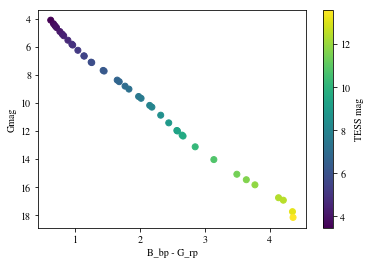

In [15]:
# These are absolute mags
G_B = iso['G_BPbrmag'].values[::-1]
G_R = iso['G_RPmag'].values[::-1]
G_mag = iso['Gmag'].values[::-1]
T = iso['TESSmag'].values[::-1]
BminR = G_B - G_R
mask = (G_B > 4) & (BminR > 0) & (BminR < 4.5)
plt.scatter(BminR[mask], G_B[mask], c=T[mask])
plt.gca().invert_yaxis()
plt.xlabel('B_bp - G_rp')
plt.ylabel('Gmag')
plt.colorbar(label='TESS mag')

TESS_mag_int = np.interp(Gbp_min_Grp, BminR[mask], T[mask])

In [16]:
# Zero point TESS flux (from Sullivan 2017)
Tf0 = 4.03e-6*u.erg/u.s/u.cm**2

# TESS apparent magnitude
m_t = TESS_mag_int + 5*np.log10(dist.value) - 5
f = 10**(-m_t/2.5)*Tf0
L = 4*np.pi*(dist.to(u.cm))**2*f
L

<Quantity [3.27568742e+32, 2.61052587e+32, 2.47135568e+31, ...,
           2.77676689e+30, 8.91590988e+32, 2.02334782e+32] erg / s>

In [17]:
# Not sure to convert TESS mags into luminosity, lets just use GAIA G band for now
#G = tess_gaia['phot_g_mean_mag']
#Mbol = 4.74
#L = 10**((Mbol-G)/2.5)

In [18]:
tess_gaia['source_id']

0        4613644974485983104
1        4613782413441133696
2        4613787700545468800
3        4613787704840817664
4        4613916485140439168
5        4614483077225903232
6        4614776676894701440
7        4614836703357503104
8        4614864607761106432
9        4614897558749924352
10       4614919308462547072
11       4614931093854496640
12       4614969851639215488
13       4615026270329620608
14       4615055854064590208
15       4615110932725370624
16       4615112032236982656
17       4615164636996477696
18       4615201775577968896
19       4615252456190967424
20       4615264623834941440
21       4615337225962072448
22       4615347911841098240
23       4615407349891806336
24       4615479127384787072
25       4615487171860512384
26       4615487996494226304
27       4615518439222361856
28       4615556475452740480
29       4615559602188919552
                ...         
18539    6764567310746461824
18540    6764585315249574016
18541    6764666576031119488
18542    67646

In [29]:
f_out = pd.DataFrame({'TIC':tics, 'r_est':dist, 'lum':L, 'G_BPbrmag':tess_gaia['phot_bp_mean_mag'], \
                      'G_RPmag':tess_gaia['phot_rp_mean_mag'], 'G_mag':tess_gaia['phot_g_mean_mag'],\
                       'source_id':tess_gaia['source_id'], 'ra':tess_gaia['ra'], 'dec':tess_gaia['dec']})
f_out.to_csv('ticGAIA1to13.csv')

In [30]:
dfa = pd.read_csv('ticGAIA1to13.csv')
dfa['source_id']

0         4613644974485983104
1         4613782413441133696
2         4613787700545468800
3         4613787704840817664
4         4613916485140439168
5         4614483077225903232
6         4614776676894701440
7         4614836703357503104
8         4614864607761106432
9         4614897558749924352
10        4614919308462547072
11        4614931093854496640
12        4614969851639215488
13        4615026270329620608
14        4615055854064590208
15        4615110932725370624
16        4615112032236982656
17        4615164636996477696
18        4615201775577968896
19        4615252456190967424
20        4615264623834941440
21        4615337225962072448
22        4615347911841098240
23        4615407349891806336
24        4615479127384787072
25        4615487171860512384
26        4615487996494226304
27        4615518439222361856
28        4615556475452740480
29        4615559602188919552
                 ...         
118857    6764567310746461824
118858    6764585315249574016
118859    